<a href="https://colab.research.google.com/github/jyothikaperabathula/FmmlLab-1/blob/main/FMML_Module_5_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Akshit Garg
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

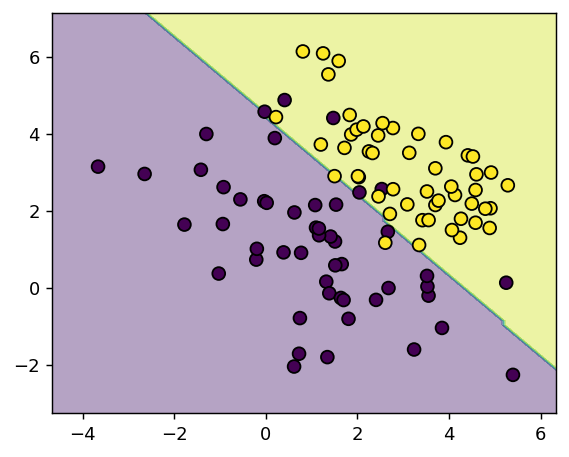

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


<ipython-input-3-bb653c8acc51>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


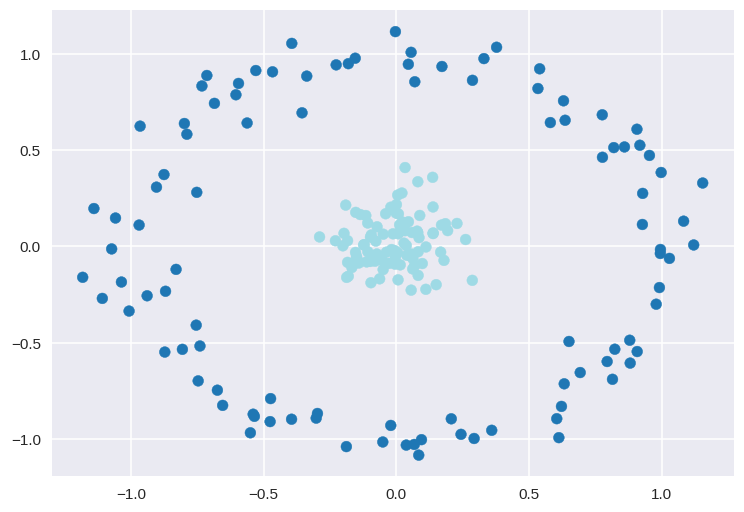

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)

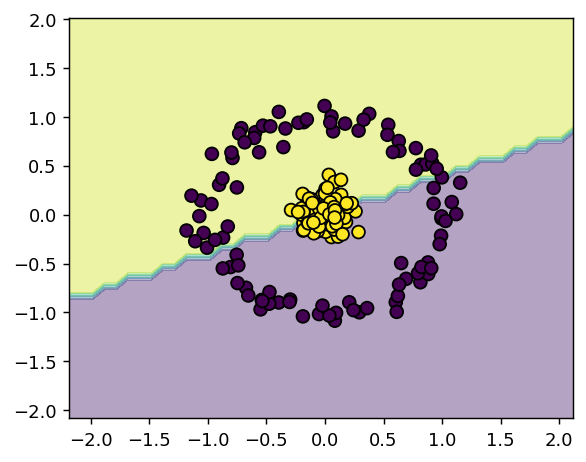

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go


In [8]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

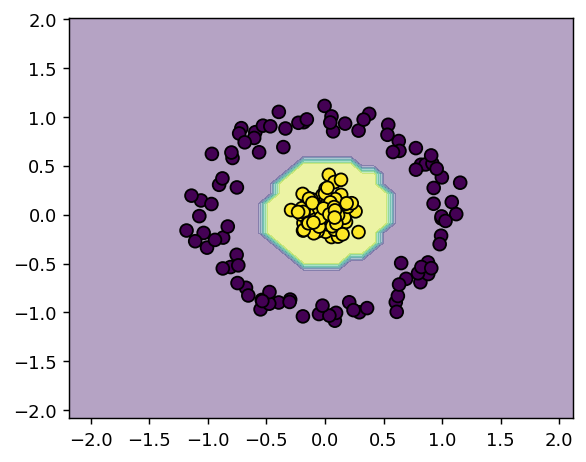

In [9]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

**ANSWERS:**

Try to run the same experiment after filtering different features, 2 at a time.

A) Hypothetical Scenario:
Imagine we have a dataset of houses for sale with the following features:

Square footage (in square meters)
Number of bedrooms
Distance to the city center (in kilometers)
Age of the house (in years)
Price (in thousands of dollars)
We want to understand how the combination of features affects the house price.

Step-by-Step Experiment:

Original Dataset: Start with the complete dataset.

Filter by Feature Pairs:

Filter out square footage and number of bedrooms.
Filter out square footage and distance to the city center.
Filter out square footage and age of the house.
Filter out number of bedrooms and distance to the city center.
Filter out number of bedrooms and age of the house.
Filter out distance to the city center and age of the house.
Analysis: For each filtered dataset pair, train a regression model to predict the house price using the remaining features. Analyze the model's performance metrics (e.g., RMSE, R^2) and the importance of features in predicting the house price.

Results:

By comparing the performance and feature importance across different filtered datasets, we can infer:
Which pairs of features are most influential in predicting house prices.
How the inclusion/exclusion of specific features affects the predictive power of the model.

In [11]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

# Generate a toy dataset
X, y = make_regression(n_samples=1000, n_features=4, noise=0.1, random_state=42)

feature_names = ["Square Footage", "Bedrooms", "Distance to City Center", "Age of House"]

# Function to filter features and run the experiment
def run_experiment(features_to_exclude):
    included_features = [f for f in feature_names if f not in features_to_exclude]
    print(f"\nRunning experiment with features: {included_features}")

    # Filter X based on features_to_exclude
    filtered_X = X[:, [feature_names.index(f) for f in included_features]]

    # Split the dataset into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(filtered_X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Coefficients: {model.coef_}")

# Generate combinations of 2 features to exclude
for i in range(1, len(feature_names)):
    combinations_list = list(combinations(feature_names, i))
    for combo in combinations_list:
        run_experiment(combo)



Running experiment with features: ['Bedrooms', 'Distance to City Center', 'Age of House']
Mean Squared Error: 2467.002644965095
R^2 Score: 0.8026431273163803
Coefficients: [ 8.68365341 99.15656226 47.78940237]

Running experiment with features: ['Square Footage', 'Distance to City Center', 'Age of House']
Mean Squared Error: 82.50960353225473
R^2 Score: 0.993399343388332
Coefficients: [51.82202772 97.16440203 48.53365229]

Running experiment with features: ['Square Footage', 'Bedrooms', 'Age of House']
Mean Squared Error: 8531.176384638473
R^2 Score: 0.3175174355727455
Coefficients: [55.38590578  7.56608745 45.32676645]

Running experiment with features: ['Square Footage', 'Bedrooms', 'Distance to City Center']
Mean Squared Error: 2290.336335648567
R^2 Score: 0.8167761929563486
Coefficients: [51.21066491  8.71367786 95.84761209]

Running experiment with features: ['Distance to City Center', 'Age of House']
Mean Squared Error: 2565.4030058102567
R^2 Score: 0.7947712316266959
Coefficien

Usi ng different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

A)   Python code snippet demonstrating how to use different types of kernels for the Support Vector Machine (SVM) using the scikit-learn library. This code will use the popular Iris dataset for demonstration purposes.

Kernel: linear, Accuracy: 0.80


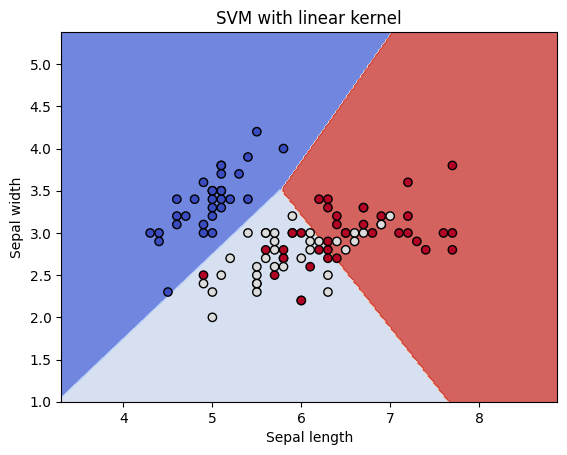

Kernel: poly, Accuracy: 0.73
Kernel: rbf, Accuracy: 0.80


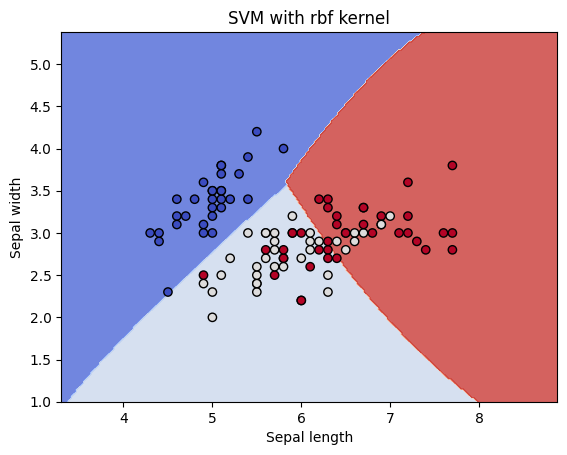

Kernel: sigmoid, Accuracy: 0.29


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    # Train the SVM model
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")

    # Visualization (only for linear and rbf kernels due to visualization simplicity)
    if kernel in ['linear', 'rbf']:
        # Create a meshgrid for visualization
        h = 0.02  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the training points
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.title(f'SVM with {kernel} kernel')
        plt.show()


This code snippet performs the following:

Loads the Iris dataset.
Splits the dataset into training and testing sets.
Trains SVM models with different kernels (linear, poly, rbf, sigmoid).
Evaluates each model's accuracy on the testing set.
For the linear and rbf kernels, it also visualizes the decision boundaries.